# 1. See the data
## Using Python, Pandas, Matplotlib, Bokeh to visualize data

In [20]:
# Import the panda library for data analysis
import pandas as pd
# import matplotlib for basic charts in Python
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data = pd.read_csv("Data/gapminder_tidy.csv", index_col='Year', thousands=',')
data.head()

,Country,fertility,life,population,child_mortality,gdp,region
Year,,,,,,,
1964,Afghanistan,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1965,Afghanistan,7.671,34.152,10697983.0,334.1,1182.0,South Asia
1966,Afghanistan,7.671,34.662,10927724.0,328.7,1168.0,South Asia
1967,Afghanistan,7.671,35.170,11163656.0,323.3,1173.0,South Asia
1968,Afghanistan,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10111 entries, 1964 to 2006
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          10111 non-null  object 
 1   fertility        10100 non-null  float64
 2   life             10111 non-null  float64
 3   population       10108 non-null  float64
 4   child_mortality  9210 non-null   float64
 5   gdp              9000 non-null   float64
 6   region           10111 non-null  object 
dtypes: float64(5), object(2)
memory usage: 631.9+ KB


In [23]:
data.Country.unique()
# data.Country.unique().size

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Rep.', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Rep.', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Gu

#### Question: In China, what is life expectancy over the years?

In [24]:
DataperCountry = data[data['Country']=='China']

In [25]:
DataperCountry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1964 to 2013
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          50 non-null     object 
 1   fertility        50 non-null     float64
 2   life             50 non-null     float64
 3   population       50 non-null     float64
 4   child_mortality  50 non-null     float64
 5   gdp              50 non-null     float64
 6   region           50 non-null     object 
dtypes: float64(5), object(2)
memory usage: 3.1+ KB


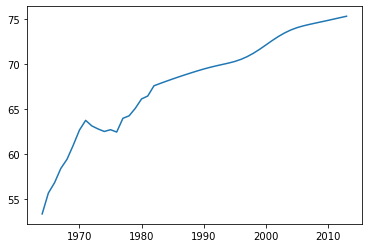

In [26]:
plt.plot(DataperCountry['life'])

#### Pop Quiz: which country has the highest life expectancy?

#### Question: In 1980, what is relationship between life expectancy and fertility?

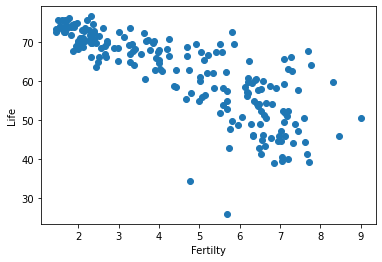

In [27]:
x = data.loc[1980].fertility
y = data.loc[1980].life
plt.xlabel("Fertilty")
plt.ylabel("Life")
plt.scatter(x,y)
plt.show()

In [28]:
# Import Bokeh library for more sophisticated visualization
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import output_notebook

In [29]:
# Make the ColumnDataSource: source
source = ColumnDataSource(data={
    'x'       : data.loc[1970].fertility,
    'y'       : data.loc[1970].life,
    'country' : data.loc[1970].Country,
})

# Create the figure: p
p = figure(title='1970', x_axis_label='Fertility (children per woman)', y_axis_label='Life Expectancy (years)',
           plot_height=400, plot_width=700,
           tools=[HoverTool(tooltips='@country')])

# Add a circle glyph to the figure p
p.circle(x='x', y='y', source=source)

# Output the file and show the figure
output_notebook()
show(p)

Loading BokehJS ...

In [30]:
# Import the necessary modules
from bokeh.io import curdoc
from bokeh.io import output_notebook

# Make the ColumnDataSource: source
source = ColumnDataSource(data ={
    'x'       : data.loc[1970].fertility,
    'y'       : data.loc[1970].life,
    'country' : data.loc[1970].Country,
    'pop'     : (data.loc[1970].population / 20000000) + 2,
    'region'  : data.loc[1970].region,
})

# Save the minimum and maximum values of the fertility column: xmin, xmax
xmin, xmax = min(data.fertility), max(data.fertility)

# Save the minimum and maximum values of the life expectancy column: ymin, ymax
ymin, ymax = min(data.life), max(data.life)

# Create the figure: plot
plot = figure(title ='Gapminder Data for 1970', plot_height = 400, plot_width = 700,
              x_range = (xmin, xmax), y_range = (ymin, ymax))

# Add circle glyphs to the plot
plot.circle(x='x', y='y', fill_alpha=0.8, source=source)

# Set the x-axis label
plot.xaxis.axis_label ='Fertility (children per woman)'

# Set the y-axis label
plot.yaxis.axis_label = 'Life Expectancy (years)'

# Add the plot to the current document and add a title
curdoc().add_root(plot)
curdoc().title = 'Gapminder'
output_notebook()
show(plot)

Loading BokehJS ...

In [31]:
# Import the necessary modules
from bokeh.layouts import widgetbox, row
from bokeh.models import Slider
from bokeh.models import HoverTool
from bokeh.models import CategoricalColorMapper
from bokeh.palettes import Spectral6

# Make the ColumnDataSource: source
source = ColumnDataSource(data ={
    'x'       : data.loc[1970].fertility,
    'y'       : data.loc[1970].life,
    'country' : data.loc[1970].Country,
    'pop'     : (data.loc[1970].population / 20000000) + 2,
    'region'  : data.loc[1970].region,
})

# Save the minimum and maximum values of the fertility column: xmin, xmax
xmin, xmax = min(data.fertility), max(data.fertility)

# Save the minimum and maximum values of the life expectancy column: ymin, ymax
ymin, ymax = min(data.life), max(data.life)

# Create the figure: plot
plot = figure(title ='Gapminder Data', plot_height = 400, plot_width = 700, x_range = (xmin, xmax), y_range = (ymin, ymax))

#to give color to each type of data point
color_mapper = CategoricalColorMapper(palette=Spectral6, factors = list(data.region.unique()))

# Add circle glyphs to the plot
plot.circle(x='x', y='y', color = {'field':'region','transform':color_mapper}, legend='region', fill_alpha=0.8, source=source)

plot.legend.location = 'bottom_left'

# Set the x-axis label
plot.xaxis.axis_label ='Fertility (children per woman)'

# Set the y-axis label
plot.yaxis.axis_label = 'Life Expectancy (years)'

# Create a HoverTool: hover
hover = HoverTool(tooltips=[('Country', '@country'), ("Fertility", "@x"), ("Life","@y")])

# Add the HoverTool to the plot
plot.add_tools(hover)


   
def modify_doc(adoc):
    # Define the callback function: update_plot
    def update_plot(attr, old, new):
        # Set the yr name to slider.value and new_data to source.data
        yr = slider.value
        new_data = {
            'x'       : data.loc[yr].fertility,
            'y'       : data.loc[yr].life,
            'country' : data.loc[yr].Country,
            'pop'     : (data.loc[yr].population / 20000000) + 2,
            'region'  : data.loc[yr].region,
        }
        source.data = new_data


    slider = Slider(start=1970, end=2010, step=1, value=1970, title='Year')

    # Attach the callback to the 'value' property of slider
    slider.on_change('value', update_plot)

    # Make a row layout of widgetbox(slider) and plot and add it to the current document
    layout = row(widgetbox(slider), plot)
    adoc.add_root(layout)

# output_notebook()
show(modify_doc)